<a href="https://colab.research.google.com/github/hirru/GenAI/blob/main/Chatbot_using_langgraph_and_astradb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install langchain langgraph cassio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 48.7 MB/s eta 0:00:00


In [19]:
import cassio

## Connection to the astra DB
astra_db_application_token = "AstraCS:yqThTCgrWUmXCZgsGUpKfvDz:e9e4ecea791eaf0434639ab76a0247271f4c1cd58a97292d264d55426a922aa7"
astra_db_id = "d0f6170d-072f-45ec-9bb7-266388d15b82"

cassio.init(token=astra_db_application_token, database_id=astra_db_id)

In [20]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.15
    Uninstalling langchain-core-0.3.15:
      Successfully uninstalled langchain-core-0.3.15


In [21]:
!pip install -U tiktoken langchain_groq langchainhub chromadb langchain langchain_huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.5 MB/s eta 0:00:

In [22]:
### Build Index

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma


### from langchain_cohere import CohereEmbeddings



# Docs to index
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
]

# Load
docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]

# Split
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=500, chunk_overlap=0
)
doc_splits = text_splitter.split_documents(docs_list)


In [23]:
docs_split

NameError: name 'docs_split' is not defined

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

In [ ]:
from langchain.vectorstores.cassandra import Cassandra
asta_vector_store=Cassandra(embedding=embeddings, table_name="qa_mini_demo", session=None, keyspace=None)

In [ ]:
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
asta_vector_store.add_documents(doc_splits)
print("Inserted %i headline." % len(doc_splits))

astra_vector_index =  VectorStoreIndexWrapper(vectorstore=asta_vector_store)

In [ ]:
retreiver = asta_vector_store.as_retriever()
retreiver.invoke("What is agent")

In [27]:
# Langgraph application
from typing import Literal

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field



/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
# Data Model

class RouteQuery(BaseModel):
  """Route a user query to most relevant datasource"""

  datasource: Literal['vectorestore', 'wiki_search'] = Field(..., description="Given a user question to route it to wikipedia or a vector store.")

In [29]:
from langchain_groq import ChatGroq
from google.colab import userdata
import os

groq_api_key = userdata.get('GROQ_API_KEY')
print(groq_api_key)

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


In [30]:
llm=ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.1-70b-versatile")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7a0a48fb2890>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7a0a48fb1c00>, model_name='llama-3.1-70b-versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [31]:
structured_llm_router = llm.with_structured_output(RouteQuery)

In [32]:
system = """You are an expert at routing a user question to a vectorstore or wikipedia.
The vectorstore contains documents related to agents, prompt engineering, and adversarial attacks.
Use the vectorstore for questions on these topics. Otherwise, use wiki-search."""
route_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "{question}"),
    ]
)

question_router = route_prompt | structured_llm_router

In [33]:
print(question_router.invoke({"question": "What is agent"}))

datasource='vectorestore'


In [34]:
print(question_router.invoke({"question": "Who is shahrukh khan"}))


datasource='wiki_search'


In [35]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=bbe4ddecaedd3495cae4e04551fc3a1783df62ab337836d9754c558dbb764e68
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [36]:
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.tools import WikipediaQueryRun

api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=200)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper)

In [ ]:
wiki.run("Tell me about shahrukh khan")

In [37]:
  ## AI Agent application from langgraph

from typing import List
from typing_extensions import TypedDict

class GraphState(TypedDict):
    """
    Represent the state of our graph

    Attributes:
        question: question
        generation: LLM generation
        documents: list of documents
    """

    question: str
    generation: str
    documents: List[str]

In [45]:
from langchain.schema import Document

def retreive(state):
    """
    Retreive documents

    Args:
      state (dict): The current graph state

    Returns:
      state (dict): New key added to state, documents, that contains retrieved documents
    """

    print("---Retrieve ---")
    question=state["question"]


    ## Retrieval
    documents=retreive.invoke(question)
    return {"documents":documents, "questions": question}

In [39]:
def wiki_search(state):
  """
  wiki search based on the rephrashed question

  Args:
    state (dict): The current graph state

  Returns:
    state (dict): Update document key with appended results
  """

  print("---Wikipedia ---")
  question = state["question"]
  print(question)

  #wiki search
  docs = wiki.invoke({"query": question})
  # print(docs["summary"])
  wiki_results = docs
  wiki_results = Document(page_content=wiki_results)

  return {"documents": wiki_results, "question": question}



In [40]:
def route_question(state):
  """
  Route question to wiki search or RAG

  Args:
    state (dict): The current graph state

  Returns:
    str: Next node to call
  """

  print("---Route Question ---")
  question = state["question"]
  source = question_router.invoke({"question": question})
  if source.datasource == "wiki_search":
    print('Route question to wiki search')
    return "wiki_search"
  elif source.datasource == "vectorestore":
    print('Route question to RAG')
    return "vectorstore"

In [41]:
!pip install langgraph

In [46]:
from langgraph.graph import END, StateGraph, START

workflow = StateGraph(GraphState)
# Define the nodes
workflow.add_node("wiki_search", wiki_search)
workflow.add_node("retreive", retreive)

workflow.add_conditional_edges(
    START,
    route_question,
    {
        "wiki_search": "wiki_search",
        "vectorstore": "retrieve",
    },
)

workflow.add_edge("retreive", END)
workflow.add_edge("wiki_search", END)

app = workflow.compile()



ValueError: At '__start__' node, 'route_question' branch found unknown target 'retrieve'

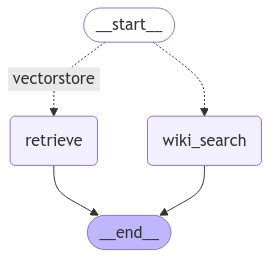

In [47]:
from IPython.display import Image, display

try:
  display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
  # This requires some extra dependencies
  pass

In [49]:
from pprint import pprint

# Run
inputs = {
    "question": "Avengers"
}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")

# Final generation
pprint(value['documents'])

---Route Question ---
Route question to wiki search
---Wikipedia ---
Avengers
"Node 'wiki_search':"
'\n---\n'
Document(metadata={}, page_content='Page: Avengers: Endgame\nSummary: Avengers: Endgame is a 2019 American superhero film based on the Marvel Comics superhero team the Avengers. Produced by Marvel Studios and distributed by Walt Disney S')
